# Applying the ResNet V2 101 model on oversampled dataset and the augmented dataset using ImageDataGenerator.


Programmer: Sindhusha Devi Parimi

Purpose: Implementation of ResNet V2 101 model

In [17]:
# Importing Tensorflow and keras libraries and packages necessary to build the model
import os
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [18]:
# Original dataset paths
old_train_dir = "C:\\Users\\sindh\\Documents\\Fall 2019\\CSCI680 - Neural Networks\\NN Project\\New\\new_train\\"
old_valid_dir = "C:\\Users\\sindh\\Documents\\Fall 2019\\CSCI680 - Neural Networks\\NN Project\\New\\new_valid\\"


# Oversampled dataset paths
new_train_dir = "C:/Users/sindh/Downloads/aptos2019-blindness-detection/new_train/"
new_valid_dir = "C:/Users/sindh/Downloads/aptos2019-blindness-detection/new_valid/"

# ResNet V2 101 Model

In [19]:
batch_size = 32                               # number of samples that will be generated throw the network is set to 32
epochs = 10                                   # we iterate through 10 times by setting the value of epoch to 10
IMG_HEIGHT = 150                              # images height set to 150
IMG_WIDTH = 150                               # image width is set to 150

## On oversampled dataset

In [20]:
#Normalizing the pixels
image_gen_train = ImageDataGenerator(rescale=1./255)

#using normalized version to implement on the train data set, class mode is chosen as categorical as it is multi label classification
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                           directory=new_train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

Found 6496 images belonging to 5 classes.


In [21]:
image_gen_val = ImageDataGenerator(rescale=1./255)

#using normalized version on validation data set
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=new_valid_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='categorical',
                                                shuffle=True)

Found 1626 images belonging to 5 classes.


In [22]:
# url for ResNet V2 101 from TF Hub. This helps in Transfer Learning
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v2_101/feature_vector/4" 

# Creating the feature extractor layer using the url
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(IMG_HEIGHT, IMG_WIDTH,3))

# Freezing the variables in the feature extractor layer
feature_extractor_layer.trainable = False


In [23]:
# Designing the ResNet V2 101 network model using feature extractor layer, the output layer is given as a dense layer with 5 nodes and the activation function sigmoid 

resnet_v2_101 = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(5, activation='sigmoid')
])
# View layers summary of the model
resnet_v2_101.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              42626560  
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 10245     
Total params: 42,636,805
Trainable params: 10,245
Non-trainable params: 42,626,560
_________________________________________________________________


In [24]:
# Compile the model using Adams optimizer, choosing the appropriate loss and metrics
resnet_v2_101.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='binary_crossentropy',
  metrics=['acc'])

In [25]:
# Training the ResNet V2 101 network

history = resnet_v2_101.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen)

Epoch 1/10
203/203 [==============================] - 2539s 13s/step - loss: 0.3986 - acc: 0.8283 - val_loss: 0.3385 - val_acc: 0.8503
Epoch 2/10
203/203 [==============================] - 2489s 12s/step - loss: 0.3254 - acc: 0.8588 - val_loss: 0.3182 - val_acc: 0.8592
Epoch 3/10
203/203 [==============================] - 2461s 12s/step - loss: 0.3038 - acc: 0.8675 - val_loss: 0.3126 - val_acc: 0.8615
Epoch 4/10
203/203 [==============================] - 2481s 12s/step - loss: 0.2919 - acc: 0.8725 - val_loss: 0.3139 - val_acc: 0.8609
Epoch 5/10
203/203 [==============================] - 2463s 12s/step - loss: 0.2782 - acc: 0.8800 - val_loss: 0.3080 - val_acc: 0.8645
Epoch 6/10
203/203 [==============================] - 2458s 12s/step - loss: 0.2712 - acc: 0.8821 - val_loss: 0.3106 - val_acc: 0.8651
Epoch 7/10
203/203 [==============================] - 2464s 12s/step - loss: 0.2645 - acc: 0.8858 - val_loss: 0.3170 - val_acc: 0.8614
Epoch 8/10
203/203 [==============================] - 2

### Plotting Accuracy and Validation curve for the oversampled dataset

In [28]:
import matplotlib.pyplot as plt

def acc_loss_plot(history, epochs):
    ''' Function for plotting the accuracy and loss curves for training and validation'''
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.xlabel('epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.show()

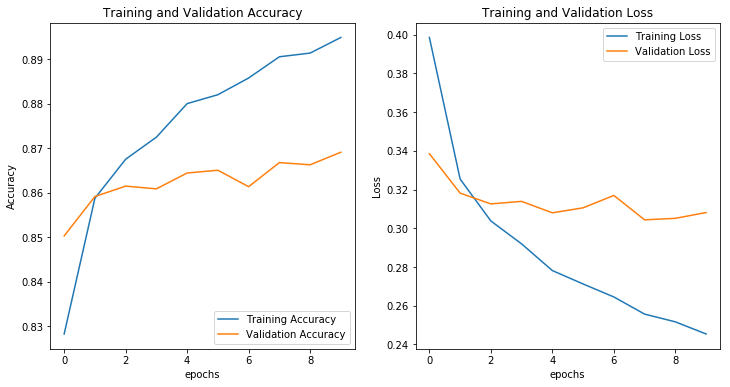

In [29]:
# Plotting accuracy and loss curves
acc_loss_plot(history,epochs)

## Applying model on augmented dataset using ImageDataGenerator 

In [30]:
# Applying Data Augmentation techniques to our training data
# Designing the generator with the required augmentation techniques
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=old_train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='categorical')

Found 2632 images belonging to 5 classes.


In [31]:
# Resizing the training data using training generator
validation_image_generator = ImageDataGenerator(rescale=1./255)


val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=old_valid_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='categorical')

Found 466 images belonging to 5 classes.


In [32]:
# Designing the ResNet V2 101 network model using feature extractor layer

resnet_v2_101_aug = tf.keras.Sequential([
  feature_extractor_layer,
  Dense(5, activation='sigmoid')
])
# View layers summary of the model
resnet_v2_101_aug.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 2048)              42626560  
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 10245     
Total params: 42,636,805
Trainable params: 10,245
Non-trainable params: 42,626,560
_________________________________________________________________


In [33]:
# Compile the model using Adams optimizer
resnet_v2_101_aug.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='binary_crossentropy',
  metrics=['acc'])

In [34]:
# Training the ResNet V2 50 network
history_old = resnet_v2_101_aug.fit_generator(
    train_data_gen,
    epochs=epochs,
    validation_data=val_data_gen
)

Epoch 1/10
83/83 [==============================] - 960s 12s/step - loss: 0.3726 - acc: 0.8531 - val_loss: 0.3260 - val_acc: 0.8687
Epoch 2/10
83/83 [==============================] - 935s 11s/step - loss: 0.2890 - acc: 0.8822 - val_loss: 0.3082 - val_acc: 0.8747
Epoch 3/10
83/83 [==============================] - 939s 11s/step - loss: 0.2808 - acc: 0.8849 - val_loss: 0.3041 - val_acc: 0.8764
Epoch 4/10
83/83 [==============================] - 1065s 13s/step - loss: 0.2709 - acc: 0.8896 - val_loss: 0.3023 - val_acc: 0.8824
Epoch 5/10
83/83 [==============================] - 1087s 13s/step - loss: 0.2663 - acc: 0.8909 - val_loss: 0.2705 - val_acc: 0.8936
Epoch 6/10
83/83 [==============================] - 946s 11s/step - loss: 0.2517 - acc: 0.8958 - val_loss: 0.2787 - val_acc: 0.8906
Epoch 7/10
83/83 [==============================] - 2196s 26s/step - loss: 0.2527 - acc: 0.8939 - val_loss: 0.2974 - val_acc: 0.8798
Epoch 8/10
83/83 [==============================] - 1083s 13s/step - loss

### Plotting Accuracy and Validation curve for the Imagedatagenerator augmented dataset

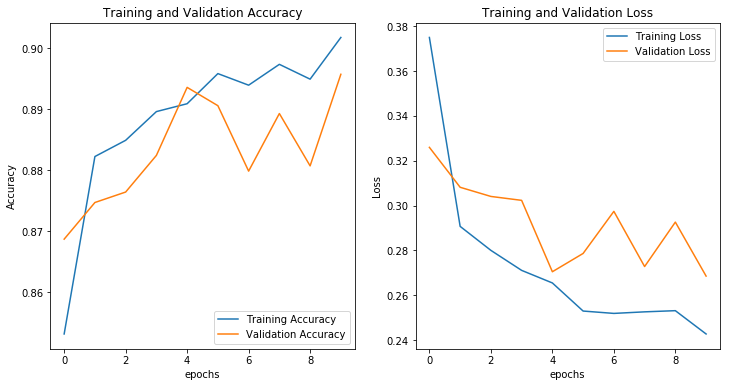

In [35]:
# Plotting accuracy and loss curves

acc_loss_plot(history_old,epochs)

### Predicting the classes on the unseen Test Data

In [36]:
#Normalizing the test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_dir = r'C:\Users\sindh\Documents\Fall 2019\CSCI680 - Neural Networks\NN Project\New\new_test'

#using the normalized version on test dataset
test_generator = test_datagen.flow_from_directory(
        directory = test_dir,
        target_size=(150, 150),
        batch_size=32,
        color_mode="rgb",
        class_mode= None,
        shuffle=False)

Found 550 images belonging to 5 classes.


In [44]:
#predicted the class labels using the model

test_generator.reset()

pred=resnet_v2_101_aug.predict_generator(test_generator,verbose=1,steps=550/32)

18/17 [===============================] - 76s 4s/step


In [46]:
import numpy as np

#taking the predicted labels into an array
predicted_class_indices=np.argmax(pred,axis=1)

#creating dataframe using the filenames and predicted labels
filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predicted_class_indices})
#saving the dataframe into csv
results.to_csv(r'C:\Users\sindh\Desktop\final_pred.csv')

In [47]:
#splitting the filename to just take the filename without the folder structure
import re
data=pd.read_csv(r'C:\Users\sindh\Desktop\final_pred.csv')

x  = data['Filename'].apply(lambda x: x.split('\\')[1])

y = pd.DataFrame(x)
z =y['Filename'].apply(lambda x: x.split('.')[0])
z = pd.DataFrame(z)
data['Filename'] = z['Filename']
data.to_csv(r'C:\Users\sindh\Desktop\final2_pred.csv')

In [48]:
import pandas as pd

#reading the actual test labels into pandas dataframe
actual=pd.read_csv(r'C:\Users\sindh\Documents\Fall 2019\CSCI680 - Neural Networks\NN Project\new_test_labels.csv')



Accuracy of the Model on unseen Test Data:0.72
Precision, Recall, Fscore :(0.6831028250026016, 0.72, 0.666388924953778, None)
[[269   0   1   0   0]
 [ 22   6  26   0   2]
 [ 32   6 109   1   2]
 [  3   0  20   2   4]
 [ 11   2  22   0  10]]


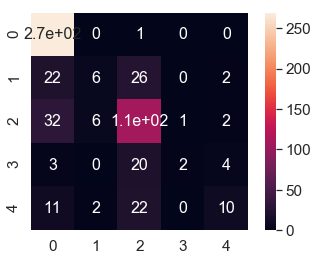

In [65]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

#to calculate accuracy of model
print("Accuracy of the Model on unseen Test Data:"+str(accuracy_score(actual['Label'], data['Predictions'],normalize=True)))

#to calculate the precision and recall
print("Precision, Recall, Fscore :"+str(
    precision_recall_fscore_support(actual['Label'], data['Predictions'], average='weighted')))

#to build confusion matrix
cm=confusion_matrix(actual['Label'],data['Predictions'])
print(cm)
plt.imshow(cm, cmap='binary')

#to visualize the confusion matrix
df_cm = pd.DataFrame(cm, range(5),
                  range(5))
#plt.figure(figsize = (12,8))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

plt.show()